**Introduction**

In [8]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip install ntscraper
!pip install vaderSentiment
!python -m spacy download en_core_web_md

     ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
     --------------------------------------- 0.0/42.8 MB 262.6 kB/s eta 0:02:43
     --------------------------------------- 0.0/42.8 MB 262.6 kB/s eta 0:02:43
     --------------------------------------- 0.1/42.8 MB 363.1 kB/s eta 0:01:58
     --------------------------------------- 0.1/42.8 MB 504.4 kB/s eta 0:01:25
     --------------------------------------- 0.1/42.8 MB 566.5 kB/s eta 0:01:16
     --------------------------------------- 0.2/42.8 MB 762.6 kB/s eta 0:00:56
     --------------------------------------- 0.3/42.8 MB 842.9 kB/s eta 0:00:51
     ---------------------------------------- 0.4/42.8 MB 1.1 MB/s eta 0:00:38
     ---------------------------------------- 0.5/42.8 MB 1.2 MB/s eta 0:00:36
      --------------------------------------- 0.6/42.8 MB 1.4 MB/s

In [2]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 435.7 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 409.6 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 595.3 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/300.2 kB 652.5 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/300.2 kB 827.9 kB/s eta 0:00:01
   ------------------------------- ------ 245.8/300.2 kB 885.4 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 926.3 kB/s eta 0:00:00
Note: you may

In [1]:
import nltk
import string
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from ntscraper import Nitter
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aliha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


30-Dec-23 19:00:24 - NumExpr defaulting to 8 threads.


In [2]:
scraper = Nitter(0)

Testing instances: 100%|███████████████████████████████████████████████████████████████| 31/31 [01:21<00:00,  2.62s/it]


In [3]:
tweets = scraper.get_tweets("elonmusk", mode = 'user', number=600)

In [4]:
import pandas as pd

def process_tweets(tweets, csv_filename='TweetsData.csv'):
    final_tweets = []

    for x in tweets['tweets']:
        data = [x['link'], x['text'], x['date'], x['stats']['likes'], x['stats']['comments']]
        final_tweets.append(data)

    columns = ['Link', 'Text', 'Date', 'Likes', 'Comments']
    dataset = pd.DataFrame(final_tweets, columns=columns)

    # Save the DataFrame to a CSV file
    dataset.to_csv(csv_filename, index=False)

    return dataset

# Call the function to process tweets and save the DataFrame to a CSV file
df = process_tweets(tweets, csv_filename='TweetsData.csv')


In [5]:
df.tail()

,Link,Text,Date,Likes,Comments
595,https://twitter.com/elonmusk/status/1712875481...,Congrats to @NASA & @SpaceX teams for successf...,"Oct 13, 2023 · 4:58 PM UTC",69808,3485
596,https://twitter.com/elonmusk/status/1712653024...,… but others say it puts the horse before the ...,"Oct 13, 2023 · 2:14 AM UTC",194368,8589
597,https://twitter.com/elonmusk/status/1712628323...,They say it’s all about the journey …,"Oct 13, 2023 · 12:36 AM UTC",362743,8761
598,https://twitter.com/tesla_na/status/1712610140...,CyberBeer now available Cyberbeer.tesla.com,"Oct 12, 2023 · 11:24 PM UTC",7943,894
599,https://twitter.com/elonmusk/status/1712509069...,"To be fair, it was just most of the world","Oct 12, 2023 · 4:42 PM UTC",183439,13257


In [6]:
print('length of data is', len(df))

length of data is 600


In [7]:
df. shape

(600, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Link      600 non-null    object
 1   Text      600 non-null    object
 2   Date      600 non-null    object
 3   Likes     600 non-null    int64 
 4   Comments  600 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 23.6+ KB


In [9]:
df.dtypes

Link        object
Text        object
Date        object
Likes        int64
Comments     int64
dtype: object

In [10]:
df.describe()

,Likes,Comments
count,600.000000,600.000000
mean,123725.636667,8633.988333
std,138077.425021,9135.182822
min,3131.000000,36.000000
25%,30057.000000,2831.750000
50%,73388.500000,6030.000000
75%,161889.500000,10515.500000
max,898752.000000,66382.000000


In [11]:
np.sum(df.isnull().any(axis=1))

0

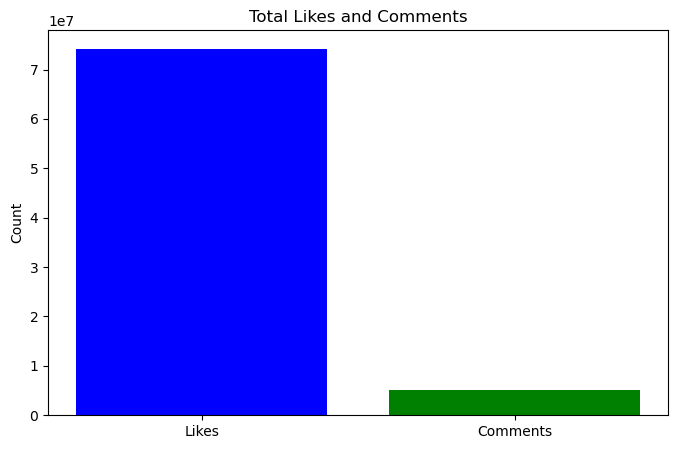

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_likes_and_comments(df):
    total_likes = df['Likes'].sum()
    total_comments = df['Comments'].sum()

    # Plotting a bar chart
    plt.figure(figsize=(8, 5))
    plt.bar(['Likes', 'Comments'], [total_likes, total_comments], color=['blue', 'green'])
    plt.title('Total Likes and Comments')
    plt.ylabel('Count')
    plt.show()

plot_likes_and_comments(df)


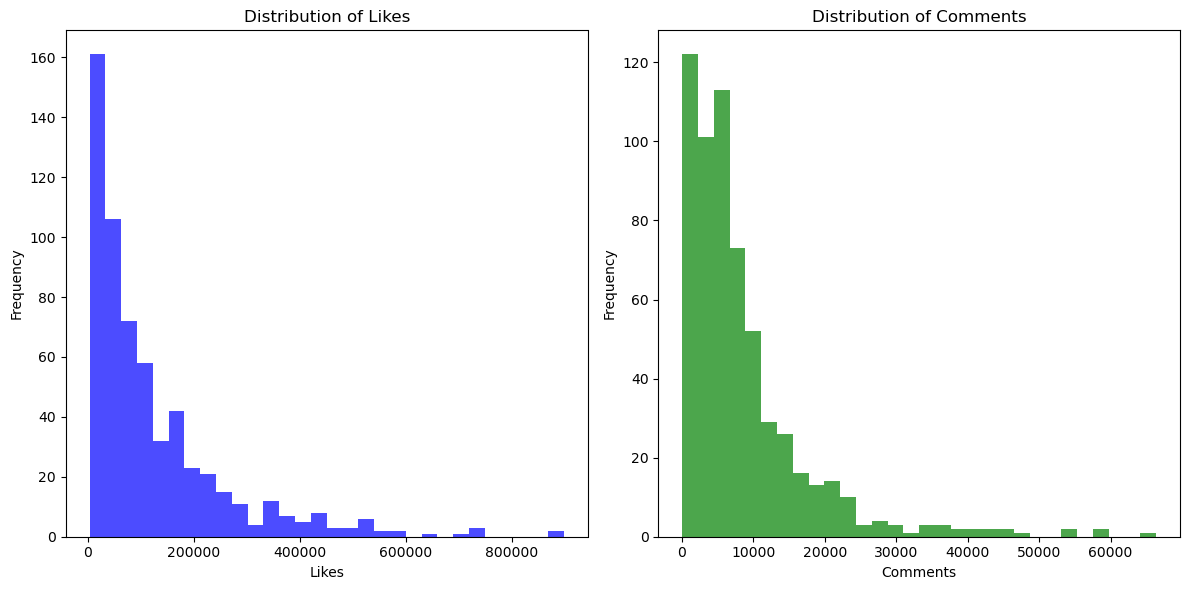

In [13]:
import matplotlib.pyplot as plt

def plot_likes_comments_distribution(df):
    plt.figure(figsize=(12, 6))

    # Distribution of Likes
    plt.subplot(1, 2, 1)
    plt.hist(df['Likes'], bins=30, color='blue', alpha=0.7)
    plt.title('Distribution of Likes')
    plt.xlabel('Likes')
    plt.ylabel('Frequency')

    # Distribution of Comments
    plt.subplot(1, 2, 2)
    plt.hist(df['Comments'], bins=30, color='green', alpha=0.7)
    plt.title('Distribution of Comments')
    plt.xlabel('Comments')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

plot_likes_comments_distribution(df)


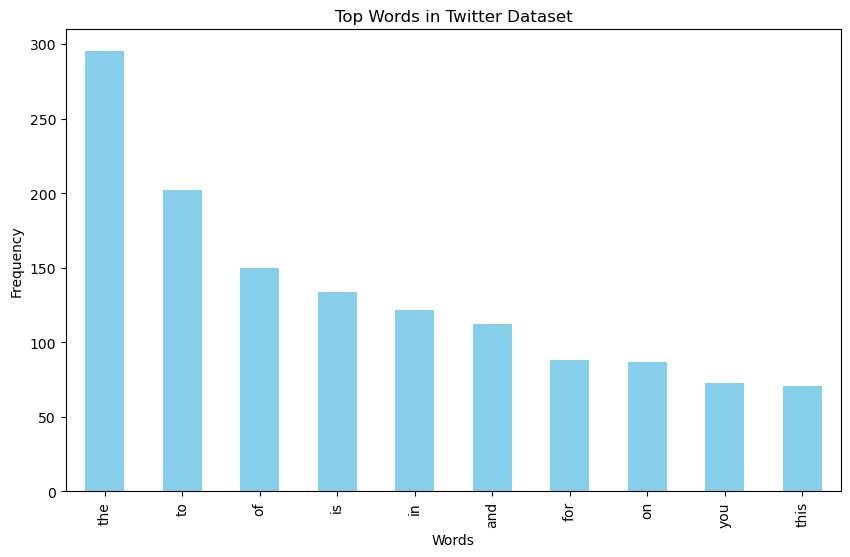

In [14]:
def plot_top_words(df, column_name='Text', top_n=10):
    # Join the preprocessed text back into a single string
    corpus = ' '.join(df[column_name].astype(str))

    # Create a CountVectorizer instance
    vectorizer = CountVectorizer()

    # Fit and transform the text data to get word frequencies
    word_freq = vectorizer.fit_transform([corpus])

    # Convert the word frequencies to a DataFrame for easier manipulation
    word_freq_df = pd.DataFrame(word_freq.toarray(), columns=vectorizer.get_feature_names_out())

    # Sum the word frequencies across all documents
    total_word_freq = word_freq_df.sum()

    # Get the top N words by frequency
    top_words = total_word_freq.nlargest(top_n)

    # Plot the top words
    plt.figure(figsize=(10, 6))
    top_words.plot(kind='bar', color='skyblue')
    plt.title('Top Words in Twitter Dataset')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

plot_top_words(df, column_name='Text', top_n=10)


**Data cleaning and processing**

**Text Conversion**

In [15]:
df['Text']=df['Text'].str.lower()
df['Text'].tail()

595    congrats to @nasa & @spacex teams for successf...
596    … but others say it puts the horse before the ...
597                they say it’s all about the journey …
598          cyberbeer now available cyberbeer.tesla.com
599            to be fair, it was just most of the world
Name: Text, dtype: object

**URL Removing**

In [16]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df['Text'] = df['Text'].apply(lambda x: cleaning_URLs(x))
df['Text'].tail()

595    congrats to @nasa & @spacex teams for successf...
596    … but others say it puts the horse before the ...
597                they say it’s all about the journey …
598          cyberbeer now available cyberbeer.tesla.com
599            to be fair, it was just most of the world
Name: Text, dtype: object

**StopWords Removing**

In [17]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [18]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['Text'] = df['Text'].apply(lambda text: cleaning_stopwords(text))
df['Text'].tail()

595    congrats @nasa & @spacex teams successfully la...
596             … but others say puts horse cartographer
597                                   say it’s journey …
598              cyberbeer available cyberbeer.tesla.com
599                                          fair, world
Name: Text, dtype: object

**Punctuation Removing**

In [19]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['Text']= df['Text'].apply(lambda x: cleaning_punctuations(x))
df['Text'].tail()

595    congrats nasa  spacex teams successfully launc...
596             … but others say puts horse cartographer
597                                   say it’s journey …
598                cyberbeer available cyberbeerteslacom
599                                           fair world
Name: Text, dtype: object

**Repeat Words Removing**

In [20]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df['Text'] = df['Text'].apply(lambda x: cleaning_repeating_char(x))
df['Text'].tail(10)

590                                    loving new tshirt
591                   falcon heavy side boosters landing
592          falcon heavy launching missiontopsyche nasa
593    view second stage escape burn deployment psych...
594    separation confirmed ✅ spacex rocket demonstra...
595    congrats nasa  spacex teams successfully launc...
596             … but others say puts horse cartographer
597                                   say it’s journey …
598                cyberbeer available cyberbeerteslacom
599                                           fair world
Name: Text, dtype: object

**Numbers Removing**

In [21]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df['Text'] = df['Text'].apply(lambda x: cleaning_numbers(x))
df['Text'].tail()

595    congrats nasa  spacex teams successfully launc...
596             … but others say puts horse cartographer
597                                   say it’s journey …
598                cyberbeer available cyberbeerteslacom
599                                           fair world
Name: Text, dtype: object

**Sentiment analysis**

In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Instantiate the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']  # Using the compound score as an overall sentiment indicator

# Apply sentiment analysis to the 'Text' column
df['Sentiment'] = df['Text'].apply(get_sentiment_scores)

# Add a new column for sentiment categories (positive, neutral, negative)
df['Sentiment_Category'] = df['Sentiment'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

# Display a sample of the results
print(df[['Text', 'Sentiment', 'Sentiment_Category']].head())


                                                Text  Sentiment  \
0  almost no one seems aware immense size lightni...     0.1761   
1  ignition single raptor engine flight  starship...     0.0000   
2                              cybertruck vegas loop     0.0000   
3  ending racism america not substituting one for...    -0.6249   
4  starship make life know multiplanetary first t...     0.0000   

  Sentiment_Category  
0           positive  
1            neutral  
2            neutral  
3           negative  
4            neutral  


D:\Software installation files\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Software installation files\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Software installation files\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Software installation files\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_

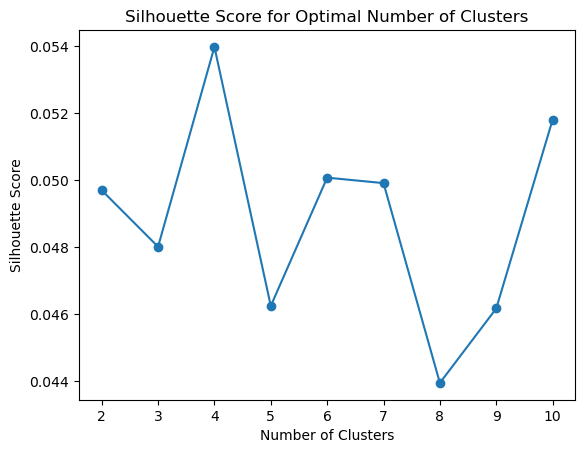

D:\Software installation files\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Tweets and Their Clusters:
                                                  Text  Cluster
0    almost no one seems aware immense size lightni...        3
1    ignition single raptor engine flight  starship...        3
2                                cybertruck vegas loop        3
3    ending racism america not substituting one for...        3
4    starship make life know multiplanetary first t...        3
..                                                 ...      ...
595  congrats nasa  spacex teams successfully launc...        2
596           … but others say puts horse cartographer        3
597                                 say it’s journey …        3
598              cyberbeer available cyberbeerteslacom        3
599                                         fair world        3

[600 rows x 2 columns]


In [23]:
def perform_kmeans_clustering(df, text_column='Text', min_clusters=2, max_clusters=10):
    # Join the preprocessed text back into a list of strings
    documents = df[text_column].tolist()

    # Use TF-IDF vectorization
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

    # Find optimal number of clusters using silhouette score
    silhouette_scores = []
    possible_clusters = range(min_clusters, max_clusters + 1)

    for n_clusters in possible_clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(tfidf_matrix)
        silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    # Plot silhouette scores
    plt.plot(possible_clusters, silhouette_scores, marker='o')
    plt.title('Silhouette Score for Optimal Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

    # Choose the optimal number of clusters
    optimal_clusters = possible_clusters[silhouette_scores.index(max(silhouette_scores))]

    # Apply k-means clustering with the optimal number of clusters
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    df['Cluster'] = kmeans.fit_predict(tfidf_matrix)

    # Display the tweets and their corresponding clusters
    print("Tweets and Their Clusters:")
    print(df[['Text', 'Cluster']])

    return df

result_df_with_clusters = perform_kmeans_clustering(df, text_column='Text', min_clusters=2, max_clusters=10)


In [24]:
import numpy as np

def add_new_features(df, text_column='Text', likes_column='Likes', comments_column='Comments'):
    # Create a new column for tweet length
    df['Tweet_Length'] = df[text_column].apply(len)

    # Create a new column for average word length
    df['Average_Word_Length'] = df[text_column].apply(lambda x: np.mean([len(word) for word in x.split()]))

    # Create a new column for the ratio of likes to comments
    df['Likes_to_Comments_Ratio'] = df[likes_column] / df[comments_column]

    # Display the DataFrame with the new features
    print(df[['Text', 'Tweet_Length', 'Average_Word_Length', 'Likes_to_Comments_Ratio']])

    return df


result_df_with_features = add_new_features(df, text_column='Text', likes_column='Likes', comments_column='Comments')


                                                  Text  Tweet_Length  \
0    almost no one seems aware immense size lightni...           142   
1    ignition single raptor engine flight  starship...            92   
2                                cybertruck vegas loop            21   
3    ending racism america not substituting one for...            55   
4    starship make life know multiplanetary first t...            81   
..                                                 ...           ...   
595  congrats nasa  spacex teams successfully launc...            93   
596           … but others say puts horse cartographer            40   
597                                 say it’s journey …            18   
598              cyberbeer available cyberbeerteslacom            37   
599                                         fair world            10   

     Average_Word_Length  Likes_to_Comments_Ratio  
0               6.150000                 4.985133  
1               7.363636       

D:\Software installation files\Anaconda\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


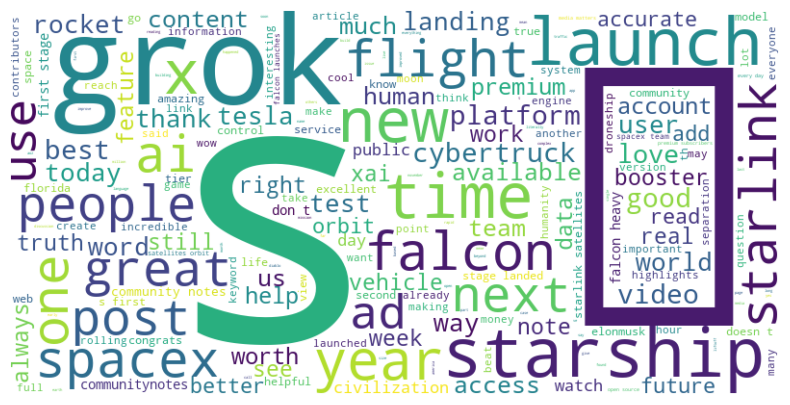

In [25]:
from wordcloud import WordCloud

def plot_word_cloud(df, text_column='Text'):
    # Join the preprocessed text into a single string
    text_corpus = ' '.join(df[text_column].astype(str))

    # Generate a WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)

    # Plot the WordCloud image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


plot_word_cloud(df, text_column='Text')


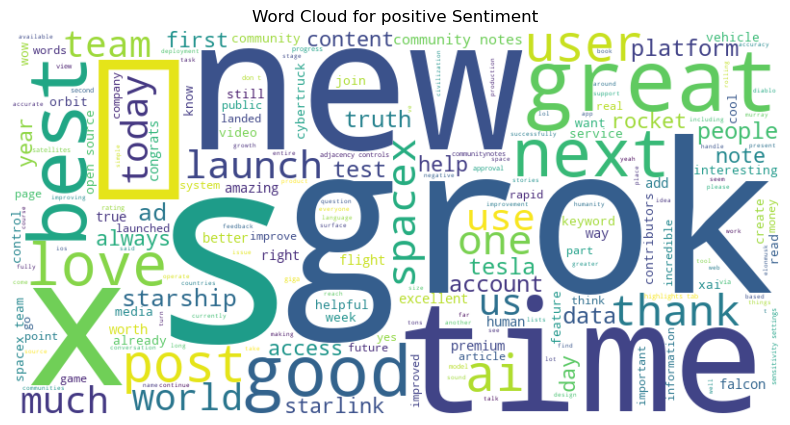

In [26]:
from wordcloud import WordCloud

def positive_word_cloud(df, sentiment_category, text_column='Text', sentiment_column='Sentiment_Category'):

    # Filter the DataFrame based on a specific sentiment category
    filtered_text = df[df[sentiment_column] == sentiment_category][text_column]

    # Join the preprocessed text into a single string
    text_corpus = ' '.join(filtered_text.astype(str))

    # Generate a WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)

    # Plot the WordCloud image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment_category} Sentiment')
    plt.axis('off')
    plt.show()


positive_word_cloud(df, sentiment_category='positive', text_column='Text', sentiment_column='Sentiment_Category')


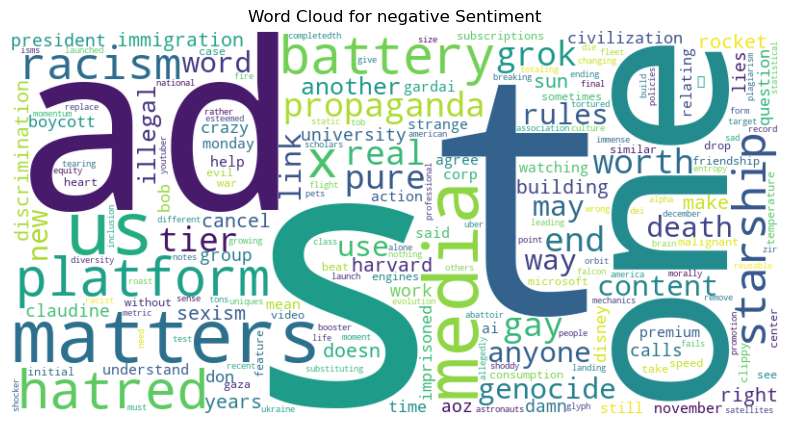

In [27]:
def negative_word_cloud(df, sentiment_category, text_column='Text', sentiment_column='Sentiment_Category'):

    # Filter the DataFrame based on a specific sentiment category
    filtered_text = df[df[sentiment_column] == sentiment_category][text_column]

    # Join the preprocessed text into a single string
    text_corpus = ' '.join(filtered_text.astype(str))

    # Generate a WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)

    # Plot the WordCloud image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment_category} Sentiment')
    plt.axis('off')
    plt.show()


negative_word_cloud(df, sentiment_category='negative', text_column='Text', sentiment_column='Sentiment_Category')


In [28]:
import spacy
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load pre-trained word embeddings model
nlp = spacy.load('en_core_web_md')

# Function to calculate cosine similarity between two text strings
def calculate_similarity(text1, text2):
    doc1 = nlp(text1)
    doc2 = nlp(text2)
    return cosine_similarity(doc1.vector.reshape(1, -1), doc2.vector.reshape(1, -1))[0, 0]


for i in range(5):
    for j in range(i+1, 5):
        similarity_score = calculate_similarity(df['Text'].iloc[i], df['Text'].iloc[j])
        print(f"Similarity between tweet {i+1} and tweet {j+1}: {similarity_score}")



Similarity between tweet 1 and tweet 2: 0.6474399566650391
Similarity between tweet 1 and tweet 3: 0.11997351050376892
Similarity between tweet 1 and tweet 4: 0.7786422967910767
Similarity between tweet 1 and tweet 5: 0.719414472579956
Similarity between tweet 2 and tweet 3: 0.30470696091651917
Similarity between tweet 2 and tweet 4: 0.5841192007064819
Similarity between tweet 2 and tweet 5: 0.6206432580947876
Similarity between tweet 3 and tweet 4: 0.15038299560546875
Similarity between tweet 3 and tweet 5: 0.14074911177158356
Similarity between tweet 4 and tweet 5: 0.6759493350982666


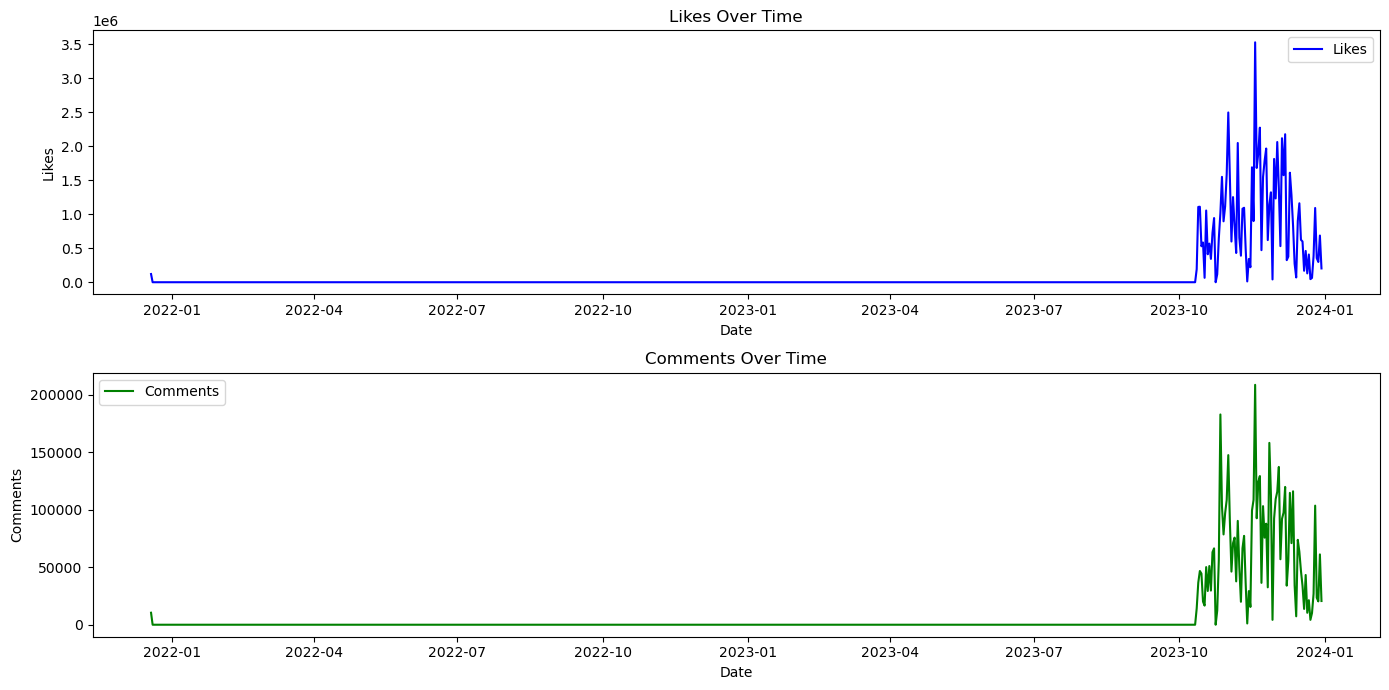

In [29]:
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt

def plot_temporal_analysis(df, date_column='Date', likes_column='Likes', comments_column='Comments', time_frequency='D'):

    # Function to parse the custom date format
    def custom_date_parser(date_string):
        try:
            return parser.parse(date_string.replace(' · ', ' '))
        except:
            return None

    # Parse the 'Date' column with the custom format
    df[date_column] = df[date_column].apply(custom_date_parser)

    # Drop rows where the parsing failed (resulting in NaT - Not a Time)
    df = df.dropna(subset=[date_column])

    # Set 'Date' as the index for time-based analysis
    df.set_index(date_column, inplace=True)

    # Resample data to a specific time frequency
    resampled_df = df.resample(time_frequency).sum()

    # Plotting the temporal analysis
    plt.figure(figsize=(14, 7))

    # Likes over time
    plt.subplot(2, 1, 1)
    plt.plot(resampled_df[likes_column], label='Likes', color='blue')
    plt.title('Likes Over Time')
    plt.xlabel('Date')
    plt.ylabel('Likes')
    plt.legend()

    # Comments over time
    plt.subplot(2, 1, 2)
    plt.plot(resampled_df[comments_column], label='Comments', color='green')
    plt.title('Comments Over Time')
    plt.xlabel('Date')
    plt.ylabel('Comments')
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_temporal_analysis(df, date_column='Date', likes_column='Likes', comments_column='Comments', time_frequency='D')


In [30]:
df.tail()

,Link,Text,Date,Likes,Comments,Sentiment,Sentiment_Category,Cluster,Tweet_Length,Average_Word_Length,Likes_to_Comments_Ratio
595,https://twitter.com/elonmusk/status/1712875481...,congrats nasa spacex teams successfully launc...,2023-10-13 16:58:00+00:00,69808,3485,0.7650,positive,2,93,7.454545,20.030990
596,https://twitter.com/elonmusk/status/1712653024...,… but others say puts horse cartographer,2023-10-13 02:14:00+00:00,194368,8589,0.0000,neutral,3,40,4.857143,22.629875
597,https://twitter.com/elonmusk/status/1712628323...,say it’s journey …,2023-10-13 00:36:00+00:00,362743,8761,0.0000,neutral,3,18,3.750000,41.404292
598,https://twitter.com/tesla_na/status/1712610140...,cyberbeer available cyberbeerteslacom,2023-10-12 23:24:00+00:00,7943,894,0.0000,neutral,3,37,11.666667,8.884787
599,https://twitter.com/elonmusk/status/1712509069...,fair world,2023-10-12 16:42:00+00:00,183439,13257,0.3182,positive,3,10,4.500000,13.837143
